In [ ]:
from google.colab import drive
import pandas as pd,numpy as np
drive.mount('/content/drive/')

Mounted at /content/drive/


**Data Collection**


Get DataSet

In [ ]:
df=pd.read_csv('/content/drive/My Drive/AI/Telco-Customer-Churn.csv')
df.head()
# data.shape

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Cleaning Data**

Removing all columns with nan greater than 30%

In [ ]:
df.dropna(thresh= 0.3 * len(df), axis=1, inplace=True)

Get all columns with nans


In [ ]:
NullData=df.isnull().sum()

NullData

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
# checking the datatype of these columns
NullData.dtypes
df[NullData.index].dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Working on my non-numeric values

In [ ]:
alpha_df = df[NullData.index].select_dtypes(exclude='number')
alpha_df.isnull().sum()


customerID          0
gender              0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
TotalCharges        0
Churn               0
dtype: int64

**Finding all colums which are integers or float**

In [ ]:
# Converting columns to int and float
int_columns=["SeniorCitizen","tenure"]
float_columns=["MonthlyCharges","TotalCharges"]

# Convert specified columns to integers
df[int_columns] = df[int_columns].astype(int)

# Replace empty strings with NaN in 'Column1'
df[float_columns] = df[float_columns].replace(' ', np.nan)

# Convert the columns to float, handling non-convertible values
for col in float_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Display the data types after conversion
df.dtypes


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [ ]:
# Fill missing values with the mean of each column
df = df.fillna(df.median())

<ipython-input-9-e1cea4c8a264>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.median())


Get the Numeric Dataset

In [ ]:
numeric_df = df[NullData.index].select_dtypes(include='number')
numeric_df.isnull().sum()
numeric_df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


Feature engineering

**Scale numerical features**

In [ ]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
df_standardized = numeric_df.copy()

# Due to Future scaling challenges and my best features not influding "SeniorCitizen" I am removing it from the scaled
df_standardized[numeric_df.columns] = standard_scaler.fit_transform(numeric_df[numeric_df.columns])

numeric_scaled_df=df_standardized
numeric_scaled_df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,-0.439916,-1.277445,-1.160323,-0.994242
1,-0.439916,0.066327,-0.259629,-0.173244
2,-0.439916,-1.236724,-0.362660,-0.959674
3,-0.439916,0.514251,-0.746535,-0.194766
4,-0.439916,-1.236724,0.197365,-0.940470
...,...,...,...,...
7038,-0.439916,-0.340876,0.665992,-0.128655
7039,-0.439916,1.613701,1.277533,2.243151
7040,-0.439916,-0.870241,-1.168632,-0.854469
7041,2.273159,-1.155283,0.320338,-0.872062


Has only alphabets

In [ ]:
alph_df = df[NullData.index].select_dtypes(exclude='number')
alph_df.isnull().sum()

customerID          0
gender              0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Churn               0
dtype: int64

removing unnessary columns

In [ ]:
alph_df.drop("customerID", axis=1, inplace=True)

In [ ]:
# Get columns of object type
object_columns = alph_df.select_dtypes(include='object').columns

# Check for empty strings in each column
columns_with_empty_strings = []
for col in object_columns:
    if any(df[col] == " "):
        columns_with_empty_strings.append(col)

# Display columns with empty strings
if columns_with_empty_strings:
    print("Columns with empty strings:")
    print(columns_with_empty_strings)
else:
    print("No columns have empty strings.")


No columns have empty strings.


Join my number and aphabet table

In [ ]:
relevantdata=pd.concat([numeric_scaled_df,alph_df],axis=1)
relevantdata

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,-0.439916,-1.277445,-1.160323,-0.994242,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,-0.439916,0.066327,-0.259629,-0.173244,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,-0.439916,-1.236724,-0.362660,-0.959674,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,-0.439916,0.514251,-0.746535,-0.194766,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,-0.439916,-1.236724,0.197365,-0.940470,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,-0.439916,-0.340876,0.665992,-0.128655,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,-0.439916,1.613701,1.277533,2.243151,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,-0.439916,-0.870241,-1.168632,-0.854469,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,2.273159,-1.155283,0.320338,-0.872062,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


**LabelEcode all aphabet values**

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
label_encoders = {}
for col in alph_df.columns:
    label_encoders[col] = LabelEncoder()
    relevantdata[col] = label_encoders[col].fit_transform(alph_df[col])



**Check Churn Distribution or customer profiles relate to churning a lot by groups**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'relevantdata' is your dataframe
num_cols = len(relevantdata.select_dtypes(include=['object']).columns)
num_rows = (num_cols - 1) // 3 + 1  # Adjust the number of rows based on the number of columns

plt.figure(figsize=(15, 5 * num_rows))

# Categorical variable distributions by Churn
categorical_cols = relevantdata.select_dtypes(include=['object']).columns
for i, col in enumerate(categorical_cols):
    plt.subplot(num_rows, 3, i + 1)
    sns.countplot(data=relevantdata, x=col, hue='Churn')
    plt.title(f'Distribution of {col} by Churn')

plt.tight_layout()
plt.show()


<Figure size 1500x0 with 0 Axes>

In [ ]:
from scipy.stats import f_oneway

# Assuming 'relevantdata' is your dataframe
numerical_features = relevantdata.select_dtypes(include=['int', 'float']).columns

# Perform ANOVA for each numerical feature
for feature in numerical_features:
    churn_grouped = [relevantdata[feature][relevantdata['Churn'] == 0], relevantdata[feature][relevantdata['Churn'] == 1]]
    f_statistic, p_value = f_oneway(*churn_grouped)

    print(f"ANOVA for {feature}: F-statistic={f_statistic}, p-value={p_value}")


ANOVA for SeniorCitizen: F-statistic=164.04142445613562, p-value=3.839860055795412e-37
ANOVA for tenure: F-statistic=997.268010499144, p-value=7.999057960610892e-205
ANOVA for MonthlyCharges: F-statistic=273.46370420771325, p-value=2.7066456068950115e-60
ANOVA for TotalCharges: F-statistic=290.4398308805982, p-value=7.508609056724576e-64
ANOVA for gender: F-statistic=0.5222569018402891, p-value=0.4699045390966534
ANOVA for Partner: F-statistic=163.06003598399533, p-value=6.220731129635033e-37
ANOVA for Dependents: F-statistic=195.14931377324118, p-value=9.140432989108222e-44
ANOVA for PhoneService: F-statistic=1.0042664747920644, p-value=0.31631478134436675
ANOVA for MultipleLines: F-statistic=10.20171154152425, p-value=0.0014092859107975187
ANOVA for InternetService: F-statistic=15.78231970125163, p-value=7.177244684485242e-05
ANOVA for OnlineSecurity: F-statistic=643.1620191575773, p-value=7.417493145232617e-136
ANOVA for OnlineBackup: F-statistic=279.87736978797085, p-value=1.223403

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4167: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


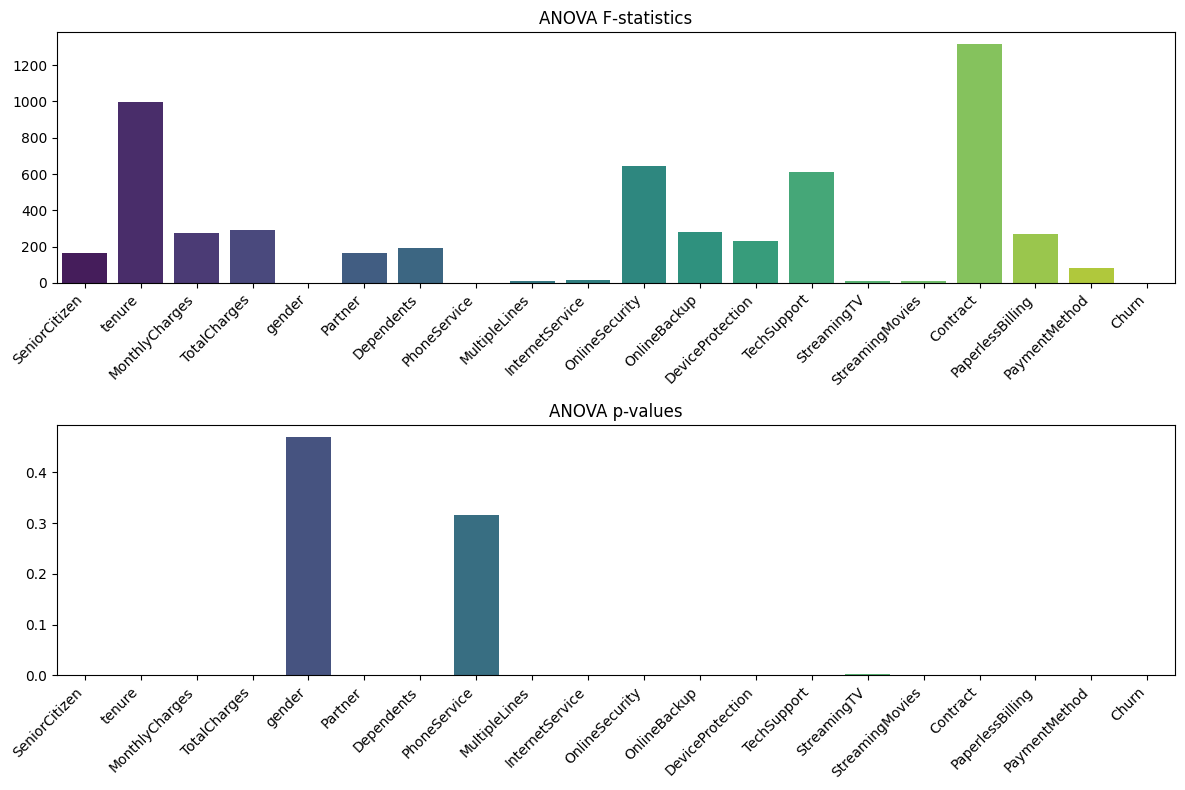

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

# Assuming 'relevantdata' is your dataframe
numerical_features = relevantdata.select_dtypes(include=['int', 'float']).columns

# Lists to store ANOVA results
features = []
F_statistics = []
p_values = []

# Perform ANOVA for each numerical feature
for feature in numerical_features:
    churn_grouped = [relevantdata[feature][relevantdata['Churn'] == 0], relevantdata[feature][relevantdata['Churn'] == 1]]
    f_statistic, p_value = f_oneway(*churn_grouped)

    # Append results to lists
    features.append(feature)
    F_statistics.append(f_statistic)
    p_values.append(p_value)

# Bar plots for ANOVA results with rotated x-axis labels
plt.figure(figsize=(12, 8))

# Bar plot for F-statistics
plt.subplot(2, 1, 1)
sns.barplot(x=features, y=F_statistics, palette='viridis', dodge=0.4)  # Adjust dodge parameter
plt.title('ANOVA F-statistics')
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels

# Bar plot for p-values
plt.subplot(2, 1, 2)
sns.barplot(x=features, y=p_values, palette='viridis', dodge=0.4)  # Adjust dodge parameter
plt.title('ANOVA p-values')
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels

plt.tight_layout()
plt.show()


SeniorCitizen: The F-statistic is high, and the p-value is very low (close to zero). This suggests that there is a significant difference in the means of SeniorCitizen between the Churn groups.

tenure, MonthlyCharges, TotalCharges: Similarly, these features show high F-statistics and very low p-values, indicating significant differences in means between Churn groups.

gender, PhoneService: These features have higher p-values (closer to 0.05), suggesting that there's no significant difference in means between the Churn groups for these variables.

Churn: As expected, the F-statistic for Churn is infinite, and the p-value is very close to zero. This is because you are essentially comparing the means of Churn against itself, and the difference is significant.

In [ ]:
#SeniorCitizen: The F-statistic is high, and the p-value is very low (close to zero). This suggests that there is a significant difference in the means of SeniorCitizen between the Churn groups.

#tenure, MonthlyCharges, TotalCharges: Similarly, these features show high F-statistics and very low p-values, indicating significant differences in means between Churn groups.

#gender, PhoneServ ice: These features have higher p-values (closer to 0.05), suggesting that there's no significant difference in means between the Churn groups for these variables.

#Churn: As expected, the F-statistic for Churn is infinite, and the p-value is very close to zero. This is because you are essentially comparing the means of Churn against itself, and the difference is significant.

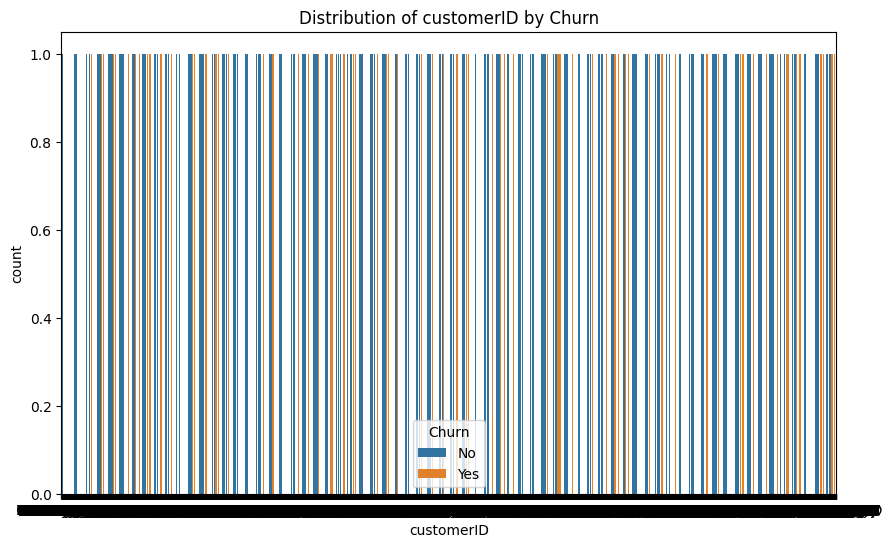

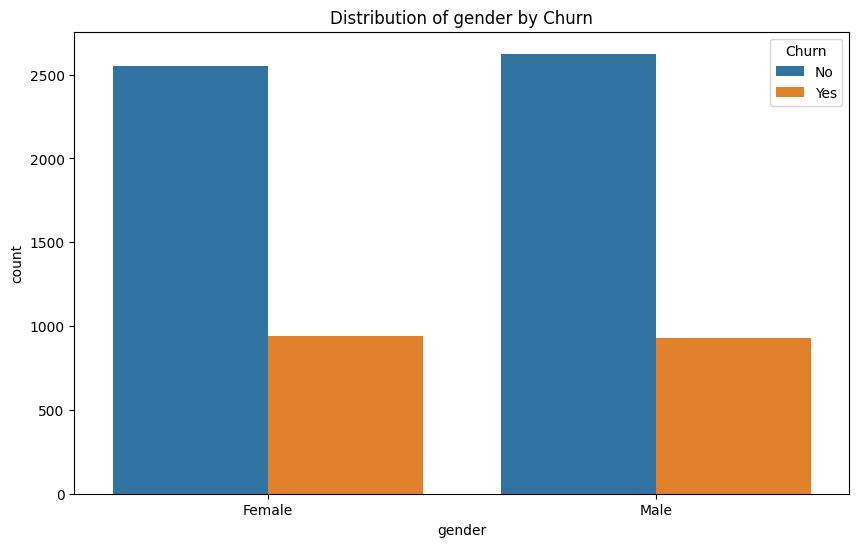

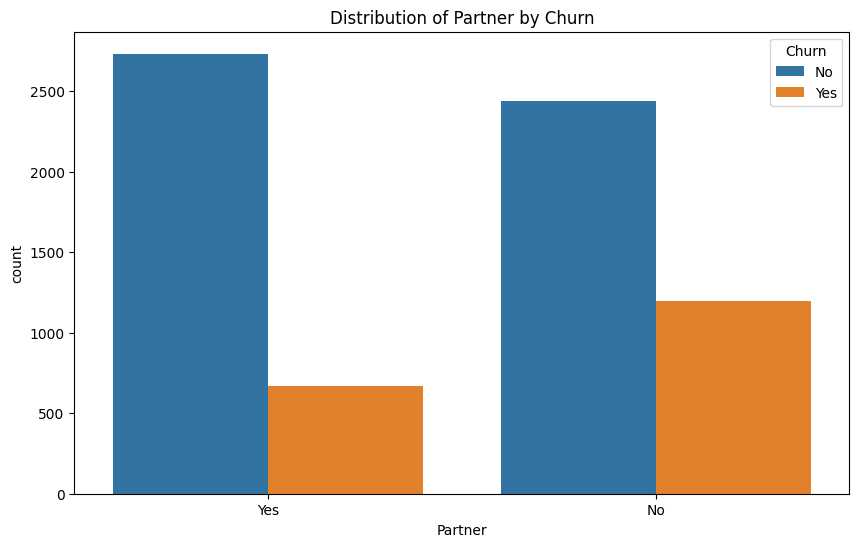

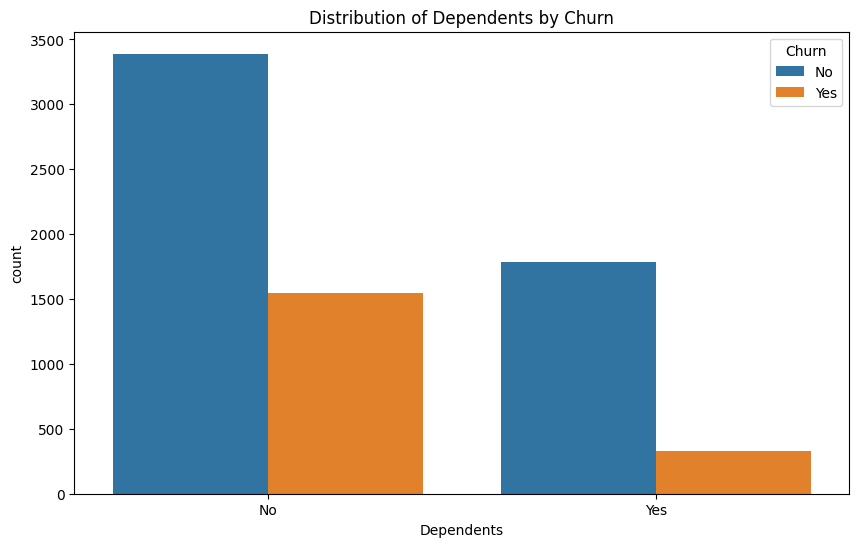

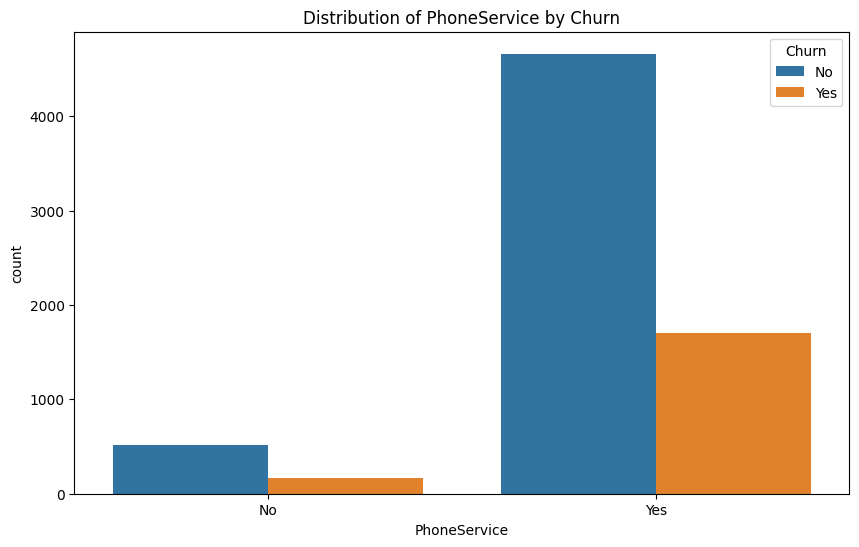

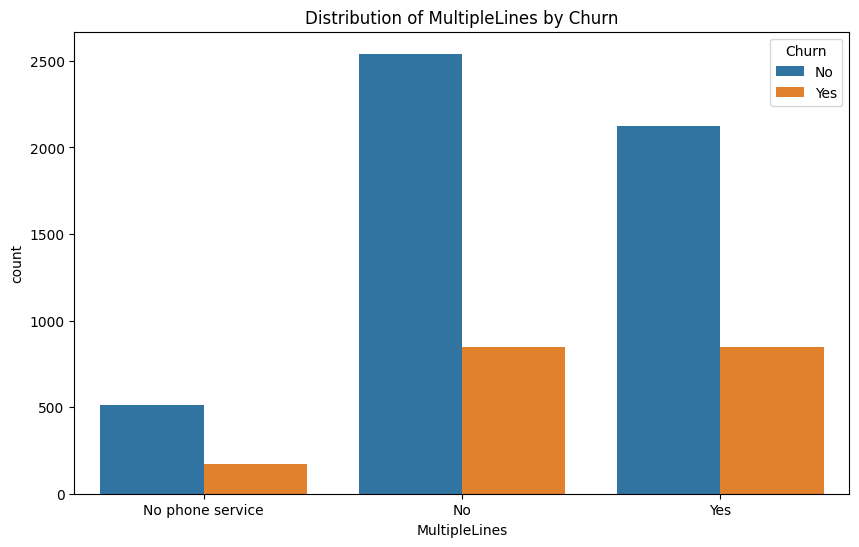

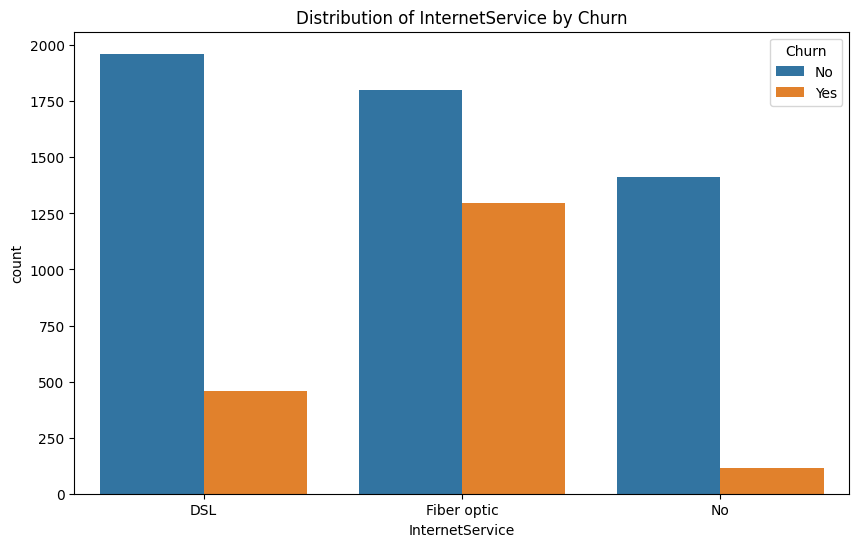

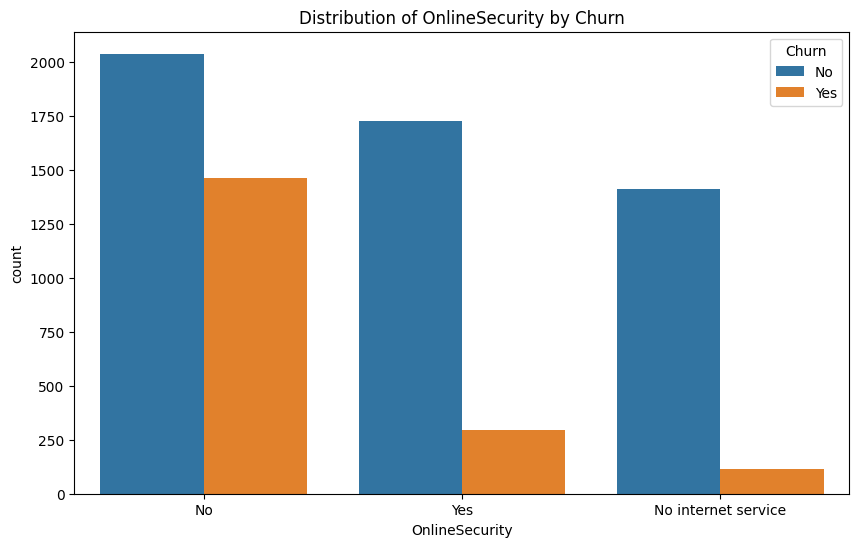

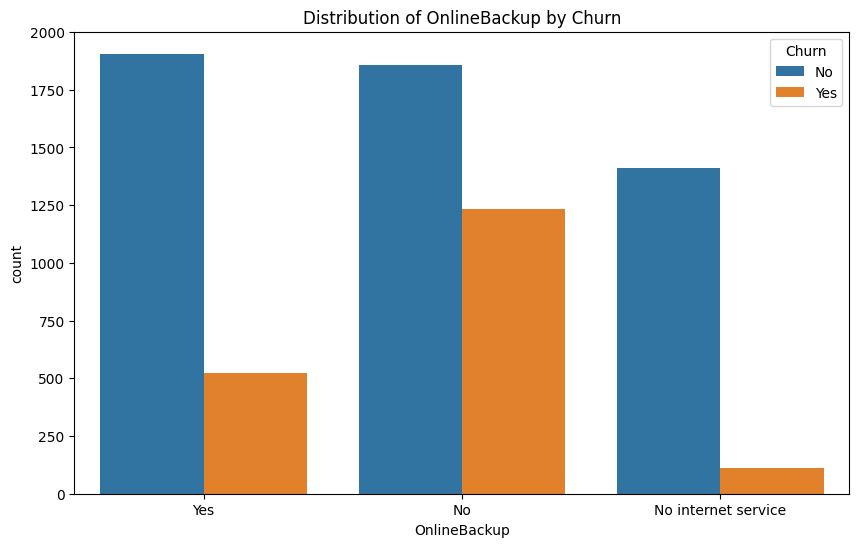

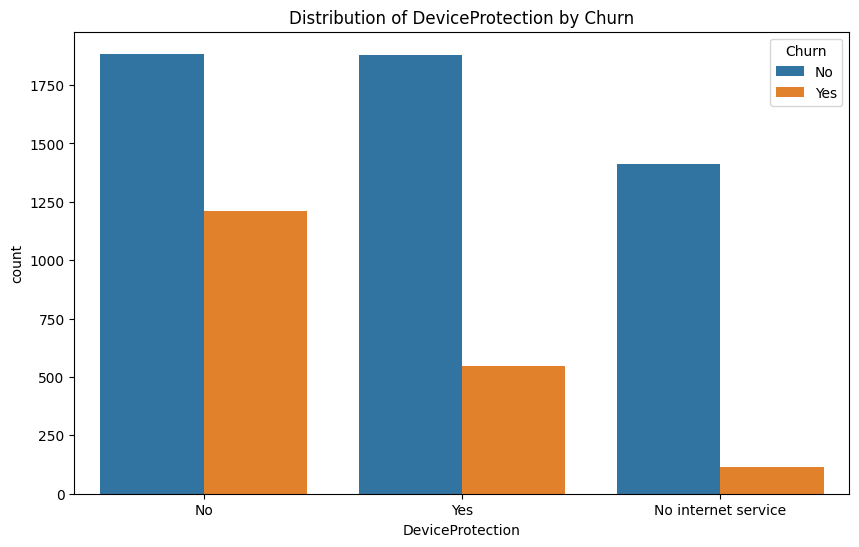

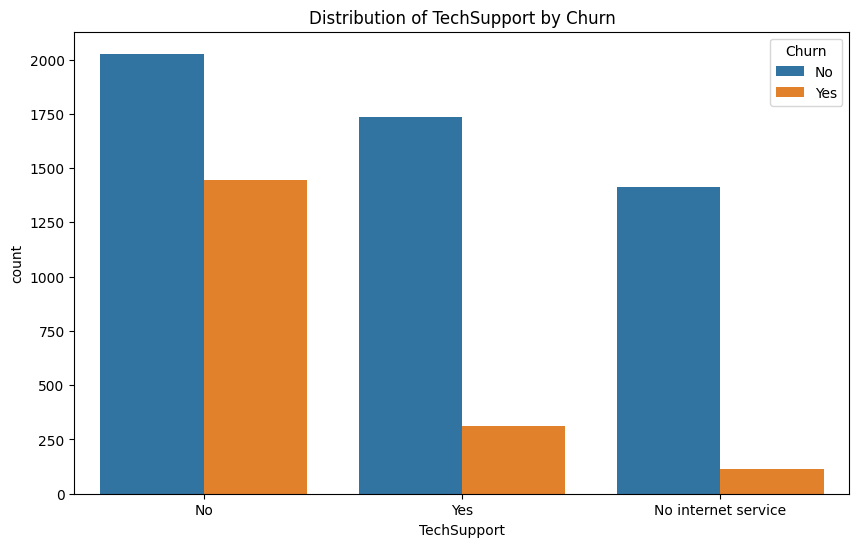

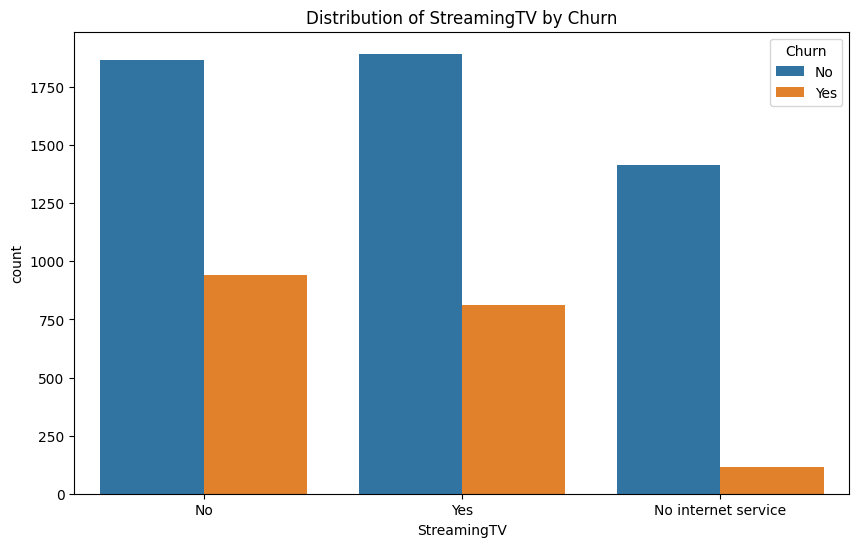

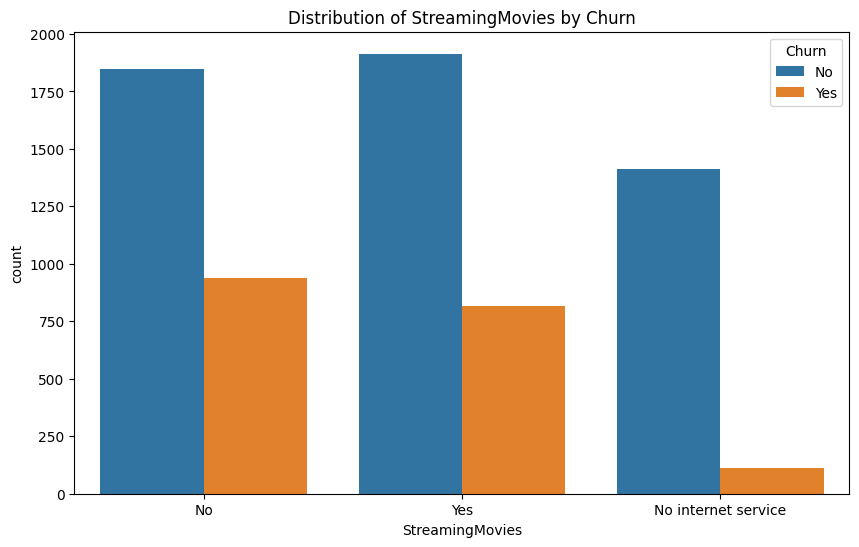

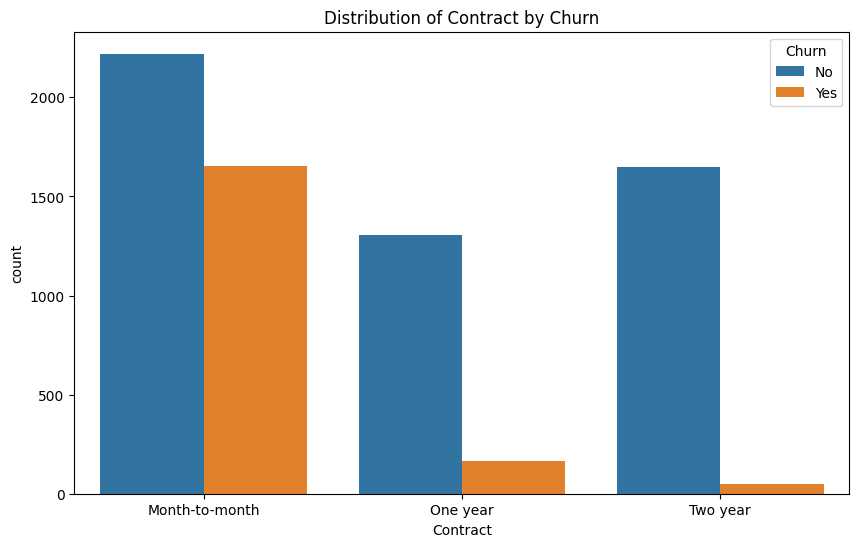

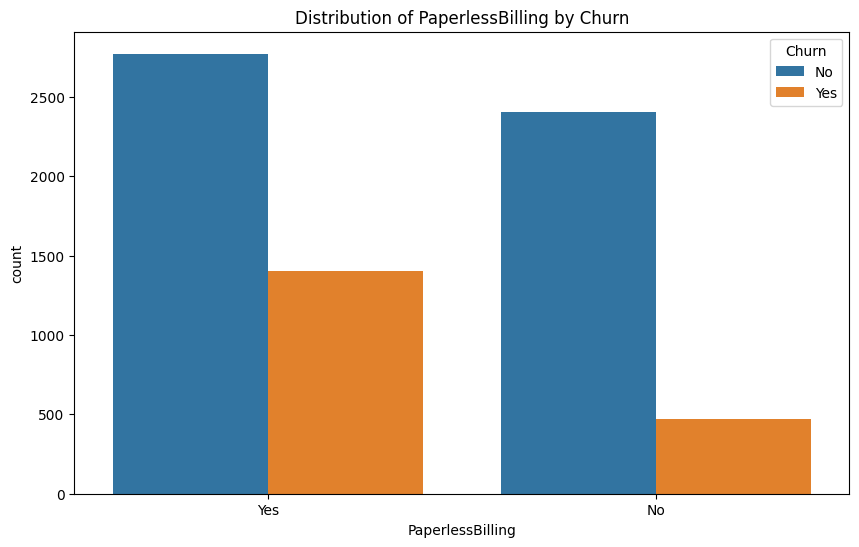

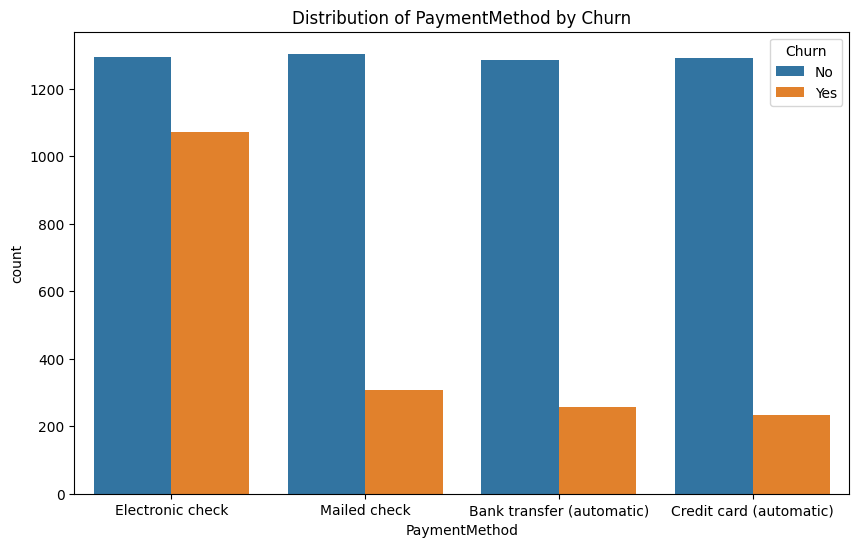

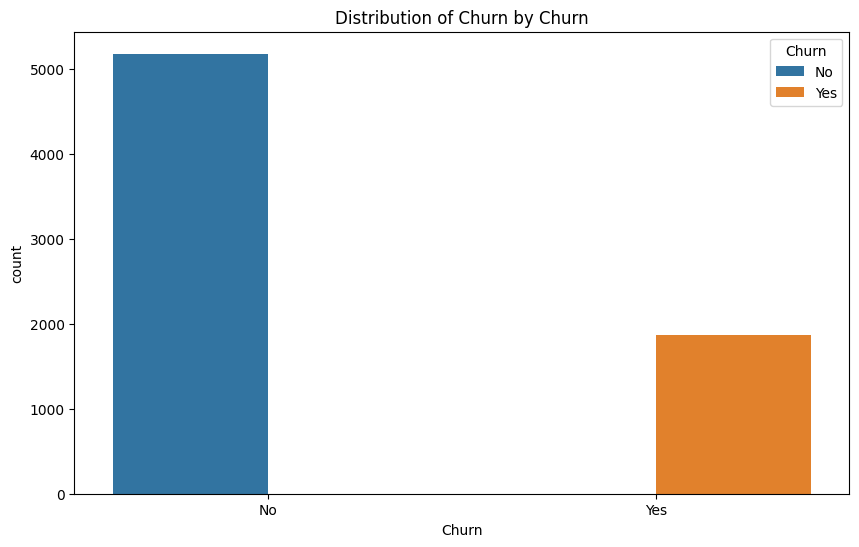

In [ ]:
# Categorical variable distributions by Churn
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f'Distribution of {col} by Churn')
    plt.show()

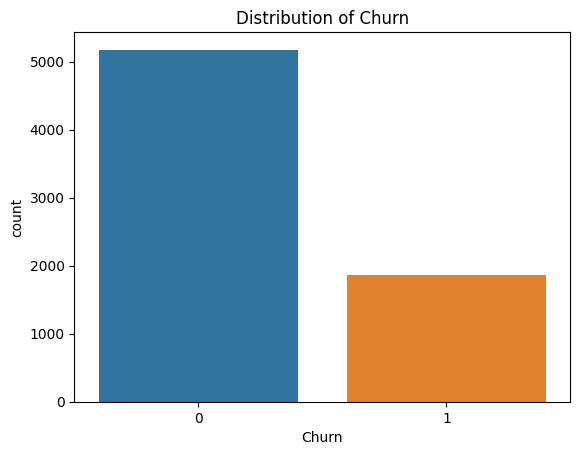

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check distribution of Churn
sns.countplot(x='Churn', data=relevantdata)
plt.title('Distribution of Churn')
plt.show()

**Explore Numeric Variables**

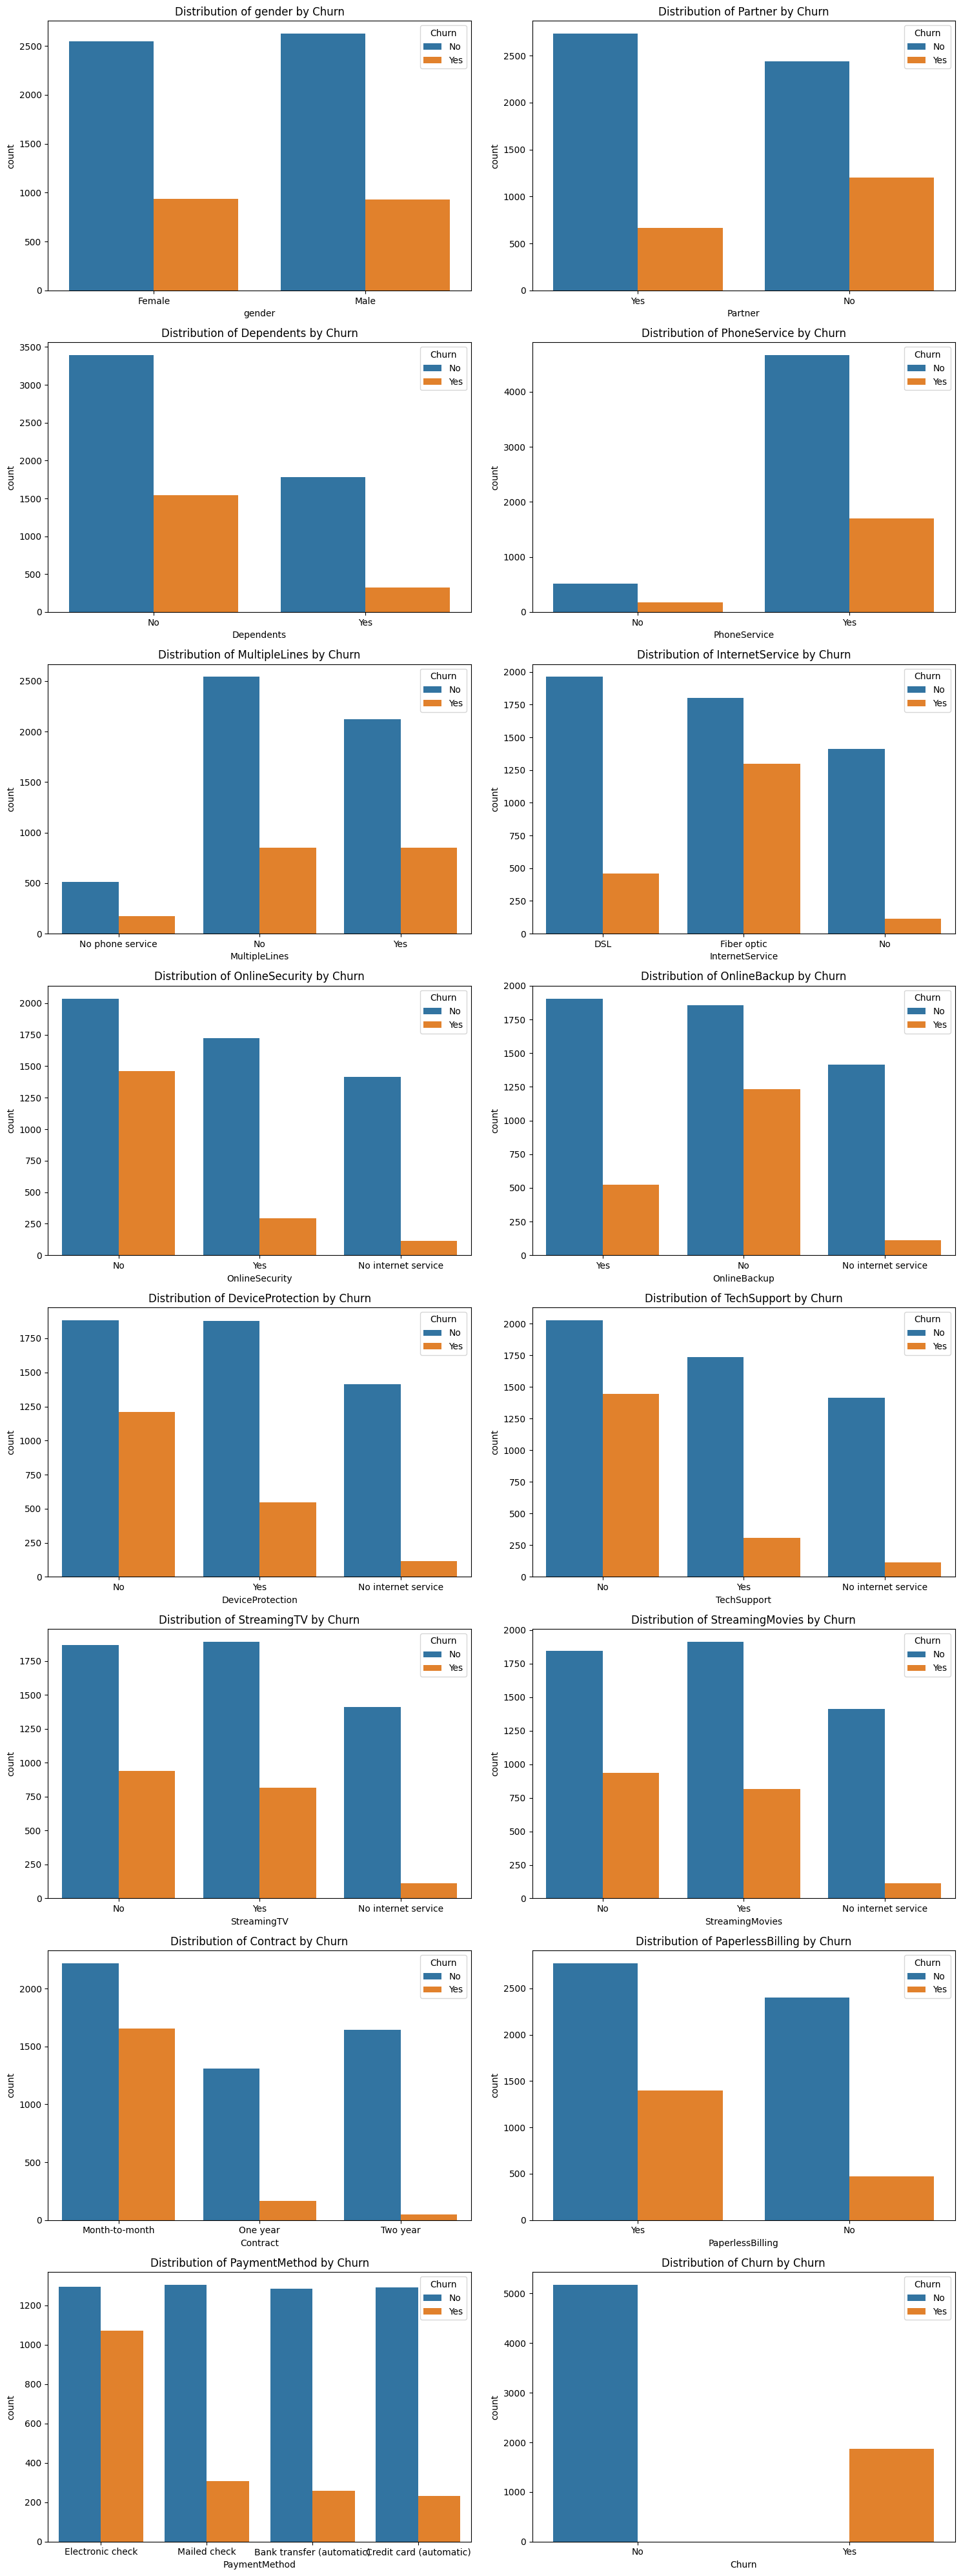

In [ ]:
# Categorical variable distributions by Churn
n_cols = 2
n_rows = (len(alph_df.columns) + n_cols - 1) // n_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5 * n_rows))

for i, col in enumerate(alph_df.columns):
    sns.countplot(x=col, hue='Churn', data=df, ax=axes[i//n_cols, i%n_cols])
    axes[i//n_cols, i%n_cols].set_title(f'Distribution of {col} by Churn')

plt.tight_layout()
plt.show()


**From this we can conclude that each feature (customer) is relavant to cause a churn and therefore is related to causing a churn**

**Splitting my dataset to get my X and y**

In [ ]:
# Split the dataset into features (X) and target (y)
X = relevantdata.drop('Churn', axis=1)  # Features
y = relevantdata['Churn']  # Target variable


**Perform future engineering on my dataset to get top 10 features**

In [ ]:
# Train Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X, y)

# Retrieve feature importances
importances = rf.feature_importances_
feature_importances = pd.Series(importances, index=X.columns)
top_features = feature_importances.nlargest(10)  # Get top 15 features
top_features

TotalCharges        0.190842
MonthlyCharges      0.181537
tenure              0.157232
Contract            0.083869
PaymentMethod       0.049920
OnlineSecurity      0.044562
TechSupport         0.041581
gender              0.027044
InternetService     0.025575
PaperlessBilling    0.025165
dtype: float64

**Visualization of my selected feature**

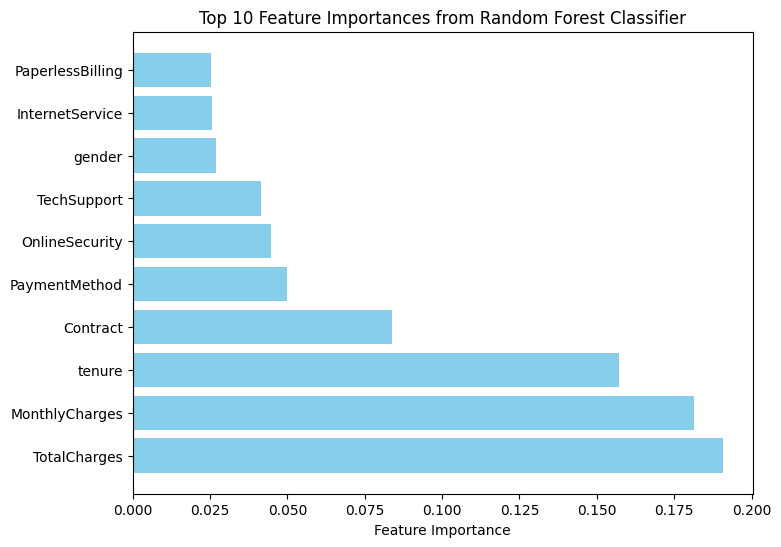

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'top_features' contains the top feature importances

# Plotting top feature importances
plt.figure(figsize=(8, 6))
plt.barh(top_features.index, top_features, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importances from Random Forest Classifier')
plt.show()

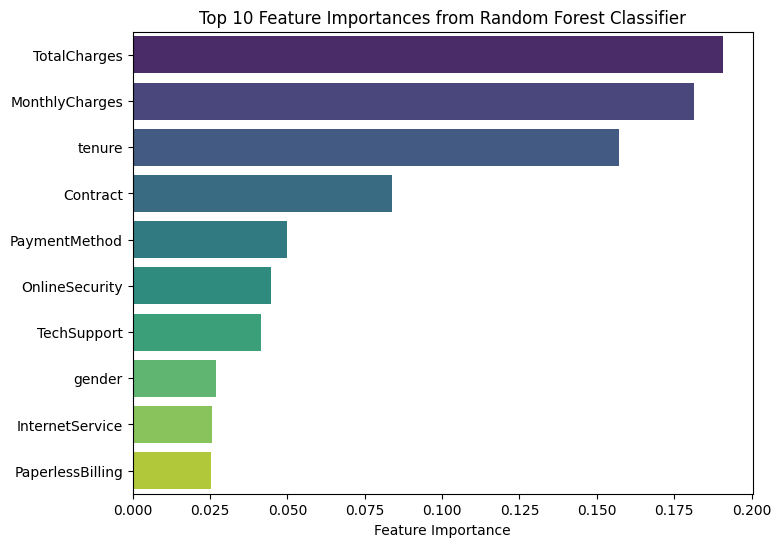

In [ ]:
import seaborn as sns

# Assuming 'top_features' contains the top feature importances

# Sort the features by their importance values
top_features = top_features.sort_values(ascending=False)

# Create a bar plot using seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importances from Random Forest Classifier')
plt.show()


**Get the scaler object to use for the app**

In [ ]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
numeric_df_scaled = numeric_df.copy()

# Scaling only selected columns
relevantdata[['tenure', 'MonthlyCharges', 'TotalCharges']] = standard_scaler.fit_transform(numeric_df[['tenure', 'MonthlyCharges', 'TotalCharges']])



In [ ]:
pd.set_option('display.max_rows', None)

relevantdata[top_features.index]
df[top_features.index].head()

,TotalCharges,MonthlyCharges,tenure,Contract,PaymentMethod,OnlineSecurity,TechSupport,gender,InternetService,PaperlessBilling
0,29.85,29.85,1,Month-to-month,Electronic check,No,No,Female,DSL,Yes
1,1889.50,56.95,34,One year,Mailed check,Yes,No,Male,DSL,No
2,108.15,53.85,2,Month-to-month,Mailed check,Yes,No,Male,DSL,Yes
3,1840.75,42.30,45,One year,Bank transfer (automatic),Yes,Yes,Male,DSL,No
4,151.65,70.70,2,Month-to-month,Electronic check,No,No,Female,Fiber optic,Yes


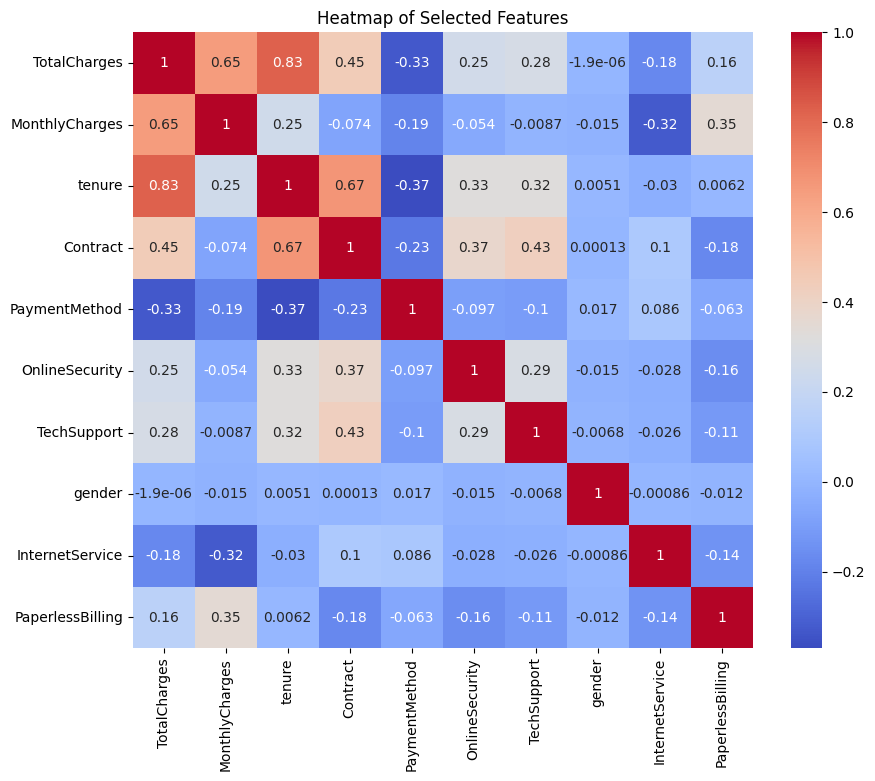

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'selected_features' contains the names of the selected features and 'X' is your feature matrix

# Select data for the selected features
selected_data = X[top_features.index]

# Convert the selected data to a pandas DataFrame for visualization
selected_df = pd.DataFrame(selected_data, columns=top_features.index)

# Create a heatmap of the selected features
plt.figure(figsize=(10, 8))
sns.heatmap(selected_df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Selected Features')
plt.show()

Selecting my x and y columns

In [ ]:
X = relevantdata[top_features.index]  # Features
y = relevantdata['Churn']  # Target variable

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,StratifiedKFold

# Split the data into training and testing sets
# First, split the data into training (80%) and the rest (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Then, split the remaining 20% into 50% for validation and 50% for testing
test_percentage = 0.5  # Splitting the remaining 20% into half for test and validation

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=test_percentage, random_state=42)



 Train a Multi-Layer Perceptron model

In [ ]:
!pip install keras==2.12.0
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Model
from keras.layers import Input, Dense, Dropout
from sklearn.model_selection import StratifiedKFold
from keras.callbacks import History

# Function to create model using Keras functional API
def create_model(dropout_rate=0.5):
    inputs = Input(shape=(X_train.shape[1],))
    firstlayer = Dense(24, activation='relu')(inputs)
    secondlayer = Dense(12, activation='relu')(firstlayer)
    thirdlayer = Dense(8, activation='tanh')(secondlayer)
    output = Dense(1, activation='sigmoid')(thirdlayer)

    model = Model(inputs=inputs, outputs=output)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Create KerasClassifier
model = KerasClassifier(build_fn=create_model)

# Define the grid search parameters
param_grid = {
    'batch_size': [10, 20, 40],
    'epochs': [70, 80, 90, 100],
}

# Perform stratified K-Fold cross-validation
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Create GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold)
grid_result = grid.fit(X_train, y_train, validation_data=(X_val, y_val))

# Access the best estimator
best_model = grid_result.best_estimator_.model

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 9.4 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.14.0 requires keras<2.15,>=2.14.0, but you have keras 2.12.0 which is incompatible.


<ipython-input-33-8b7c71abe82d>:22: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model)


Streaming output truncated to the last 5000 lines.
376/376 [==============================] - 1s 3ms/step - loss: 0.4181 - accuracy: 0.7987 - val_loss: 0.4244 - val_accuracy: 0.7997
Epoch 16/90
376/376 [==============================] - 1s 4ms/step - loss: 0.4181 - accuracy: 0.7985 - val_loss: 0.4240 - val_accuracy: 0.7955
Epoch 17/90
376/376 [==============================] - 2s 5ms/step - loss: 0.4175 - accuracy: 0.7931 - val_loss: 0.4208 - val_accuracy: 0.7997
Epoch 18/90
376/376 [==============================] - 2s 5ms/step - loss: 0.4154 - accuracy: 0.7982 - val_loss: 0.4228 - val_accuracy: 0.8054
Epoch 19/90
376/376 [==============================] - 2s 4ms/step - loss: 0.4152 - accuracy: 0.7987 - val_loss: 0.4247 - val_accuracy: 0.7955
Epoch 20/90
376/376 [==============================] - 2s 4ms/step - loss: 0.4148 - accuracy: 0.7966 - val_loss: 0.4238 - val_accuracy: 0.8026
Epoch 21/90
376/376 [==============================] - 2s 5ms/step - loss: 0.4122 - accuracy: 0.7993 - 

**Getting Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score

loss, accuracy=best_model.evaluate(X_train, y_train)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy*100:.4f}\n')

# Evaluate the model's accuracy and AUC score
best_model = grid_result.best_estimator_

# Predict on test data
y_pred = best_model.predict(X_test)
y_pred_val = best_model.predict(X_val)
# Calculate accuracyla
accuracy = accuracy_score(y_test, y_pred)
accuracy_val = accuracy_score(y_val, y_pred_val)

print(f"Accuracy: {accuracy}")
print(f"Accuracy validation: {accuracy_val}")

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred)
auc_score_val = roc_auc_score(y_val, y_pred_val)

print(f"AUC Score: {auc_score}")
print(f"Validation AUC Score: {auc_score_val}")


177/177 [==============================] - 1s 3ms/step - loss: 0.3978 - accuracy: 0.8106
Test Loss: 0.3978
Test Accuracy: 81.0614

22/22 [==============================] - 0s 4ms/step
Accuracy: 0.8226950354609929
Accuracy validation: 0.7982954545454546
AUC Score: 0.7329697308720243
Validation AUC Score: 0.7158948685857321


**Re-training model**

In [ ]:
# Retrain the model on the full training dataset with the best parameters found
best_params = grid_result.best_params_
model = KerasClassifier(build_fn=create_model, **best_params)
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),verbose=True)

# Accessing the training history
history_dict = history.history

# Evaluating model accuracy and loss on test data
test_loss, test_accuracy = model.model.evaluate(X_test, y_test)
print(f'Evaluation\n loss: {test_loss} test_accuracy: {test_accuracy}\n')
# Predict on test data
y_pred = model.predict(X_test)
y_pred_val = model.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy_val = accuracy_score(y_val, y_pred_val)
print(f"Test Accuracy: {accuracy}")
print(f"Validation Accuracy: {accuracy_val}\n")

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred)
auc_score_val = roc_auc_score(y_val, y_pred_val)
print(f"Test AUC Score: {auc_score}")
print(f"Validation AUC Score: {auc_score_val}")


<ipython-input-38-44cb3e3a31cc>:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, **best_params)


Epoch 1/70
141/141 [==============================] - 3s 4ms/step - loss: 0.6112 - accuracy: 0.6450 - val_loss: 0.4530 - val_accuracy: 0.7855
Epoch 2/70
141/141 [==============================] - 0s 2ms/step - loss: 0.4439 - accuracy: 0.7909 - val_loss: 0.4248 - val_accuracy: 0.7969
Epoch 3/70
141/141 [==============================] - 0s 2ms/step - loss: 0.4338 - accuracy: 0.7925 - val_loss: 0.4212 - val_accuracy: 0.7983
Epoch 4/70
141/141 [==============================] - 0s 3ms/step - loss: 0.4297 - accuracy: 0.7953 - val_loss: 0.4194 - val_accuracy: 0.7969
Epoch 5/70
141/141 [==============================] - 0s 2ms/step - loss: 0.4280 - accuracy: 0.7984 - val_loss: 0.4195 - val_accuracy: 0.7969
Epoch 6/70
141/141 [==============================] - 0s 2ms/step - loss: 0.4253 - accuracy: 0.7996 - val_loss: 0.4253 - val_accuracy: 0.7955
Epoch 7/70
141/141 [==============================] - 0s 3ms/step - loss: 0.4250 - accuracy: 0.7966 - val_loss: 0.4201 - val_accuracy: 0.7983
Epoch 

**Saving Model **

In [ ]:
import pickle
with open('util.pkl', 'wb') as file:
    pickle.dump(standard_scaler, file)

In [ ]:
# Save the trained model to a file
model.model.save('my_trained_keras_model.h5')